(1080, 1920, 3)
[0.00000000e+00 2.80972021e-11 5.61944043e-11 ... 6.00003539e+00
 6.00003539e+00 6.00003539e+00]


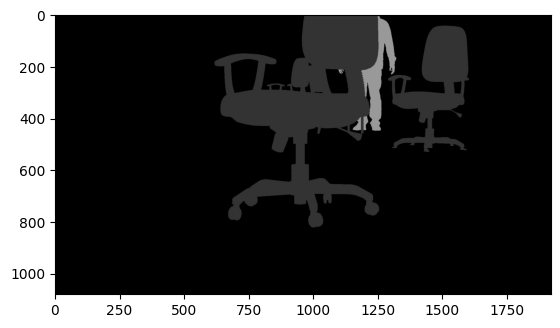

KeyboardInterrupt: 

In [ ]:
from PIL import Image
import numpy as np
from scipy.ndimage import grey_opening, grey_erosion, grey_dilation, grey_closing, median_filter, gaussian_filter

imgPath = "F:\\datasets\\eirt_output\\batch01\\mask\\Image0000.jpg"

# Load image
img = Image.open(imgPath)

# Convert to NumPy array
arr = np.array(img)/255*10
print(arr.shape)

size = 5
# arr = median_filter(arr, size=(size, size, 3))
arr = gaussian_filter(arr, sigma=(size, size, 0))
# Define a structuring element

# struct_element = np.ones((size, size, 3))

# # Opening operation on blurred images
# arr = grey_opening(arr, structure=struct_element)
# # arr = grey_closing(arr, structure=struct_element)

# Get unique pixel values
unique_vals = np.unique(arr)

print(unique_vals)

import cv2
img = cv2.imread(imgPath)
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(arr.flatten(), bins=len(unique_vals), alpha=0.7)
plt.xlabel('Pixel Values')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of Pixel Values')
plt.yscale('log')
plt.show()

In [6]:
imgPath = "E:\\datasets\\eirt_output\\mask\\Image0000.jpg"

with open(imgPath, 'rb') as f:
    img_data = f.read()
    




FileNotFoundError: [Errno 2] No such file or directory: 'E:\\datasets\\eirt_output\\mask\\Image0000.jpg'